- Load the data 
- Clean it 
- Choose the target variable 
- Encode the data ( for it to be usable by the model ) 
- Split it into train and test sets 
- ⁠load the model into a variable for you to use it ( this is without going through the hyper parameter tuning ) 
- ⁠fit the training data into that model 
- ⁠do simple predictions with the model 
- ⁠evaluate the model 
- ⁠hyper parameter fine tuning ( either grid search logic and process we learned before ) 
- ⁠use those parameters in the same model when loading it in the variable I talked about 
- ⁠then fit the training data in the new model with the right hyper parameters, 
- ⁠then do predictions 
- ⁠then evaluate it and see if there. Is any improvement in the accuracy of the model…

### 1. Load the necessary dataset and libraries


In [243]:
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, root_mean_squared_error

In [260]:
#### load the dataet
heart=pd.read_csv("heart_failure_clinical_records.csv")
heart.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [261]:
heart.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [262]:
heart.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [263]:
# Checking for null values in the dataset
null_values = heart.isnull().sum()
print(null_values)


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


#### Encoding data

In [264]:
heart.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


#### look for outliers

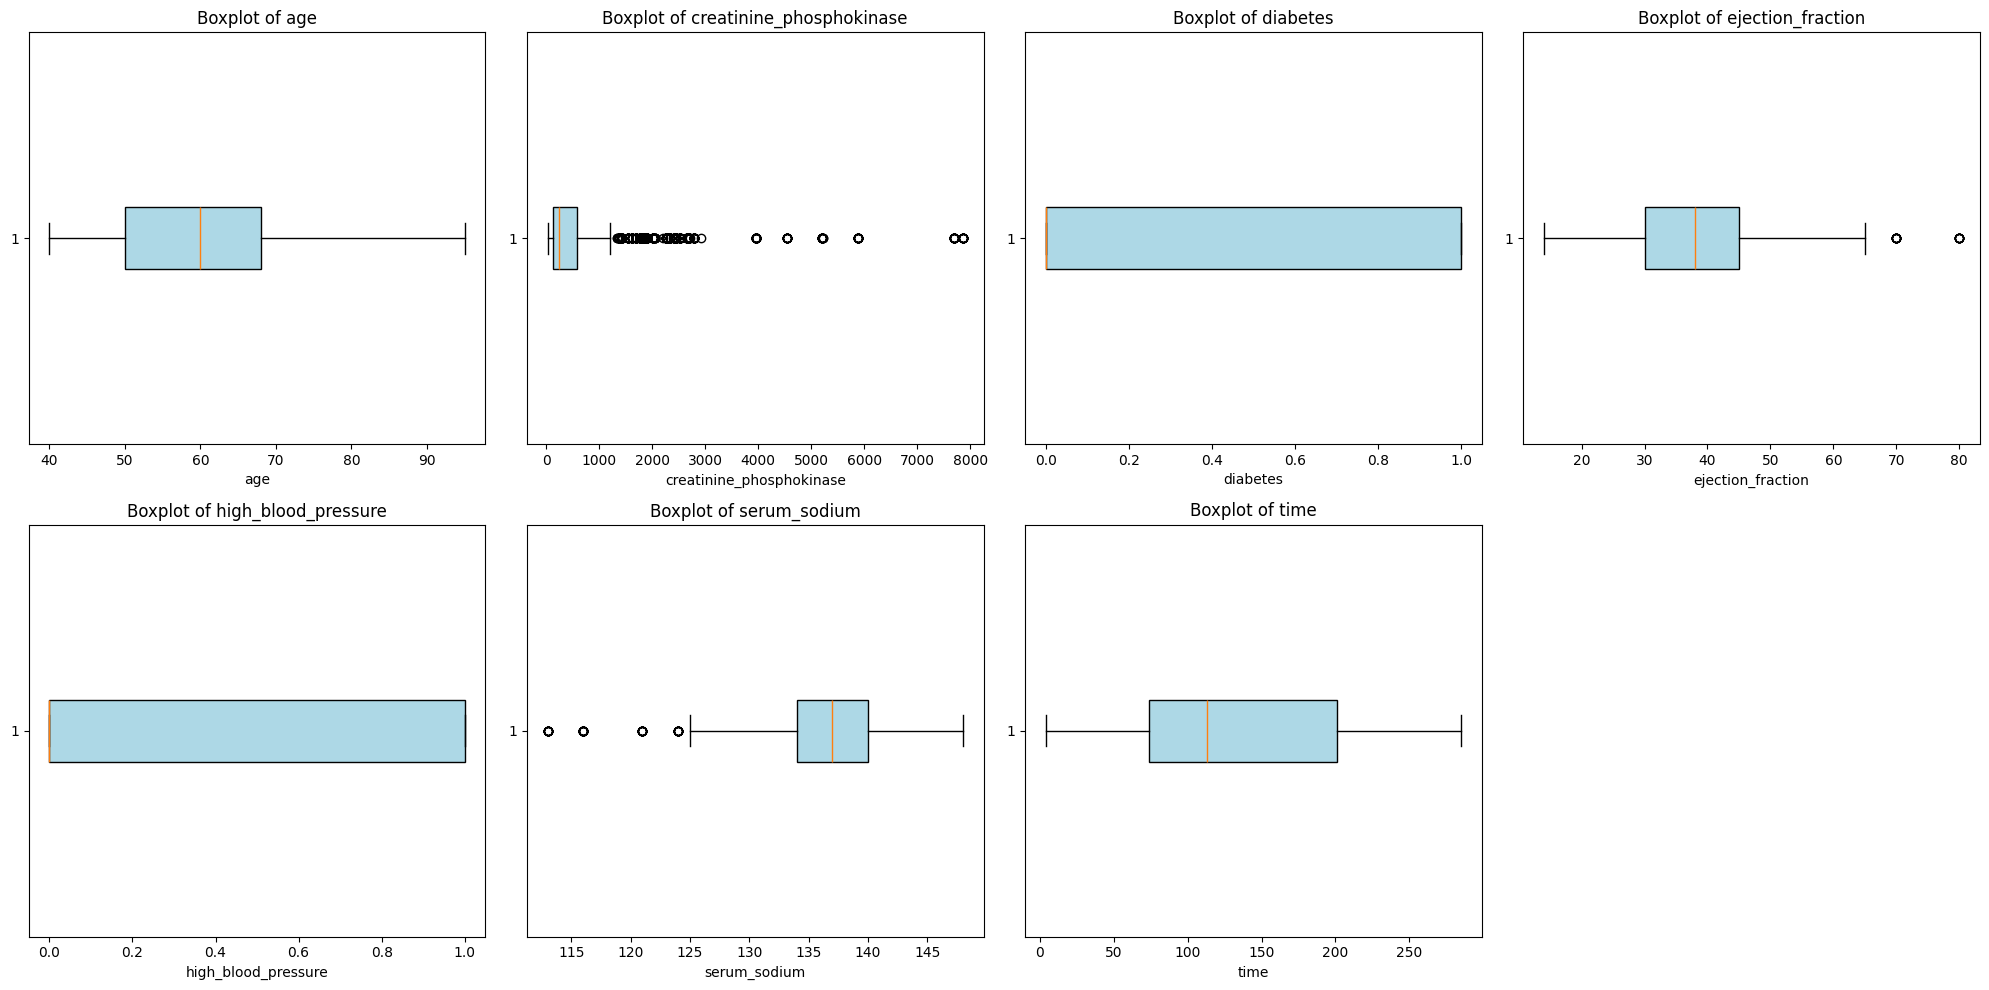

In [265]:
import matplotlib.pyplot as plt

# Ensure you replace 'heart' with your actual DataFrame variable name, e.g., 'new_data'
new_data= heart  # Replace this line if needed with your DataFrame variable name

numeric_columns = ['age',  'creatinine_phosphokinase', 'diabetes',
                   'ejection_fraction', 'high_blood_pressure', 
                   'serum_sodium', 'time']  # Removed 'sex', 'smoking', 'DEATH_EVENT' if they are not numeric

plt.figure(figsize=(20, 10))  # Adjusted figure size to accommodate more subplots

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)  # Changed to 2 rows and 4 columns for better spacing
    plt.boxplot(heart[column], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [266]:
# Removing outliers using IQR method for selected numeric columns
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filtering the dataframe to exclude outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Defining numeric columns to check for outliers (adjust if needed)
numeric_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 
                   'high_blood_pressure', 'serum_sodium', 'time']

# Applying the outlier removal function
cleaned_data = remove_outliers_iqr(new_data, numeric_columns)

# Displaying the cleaned data shape and the first few rows to verify
print(f"Original data shape: {new_data.shape}")
print(f"Cleaned data shape: {cleaned_data.shape}")
cleaned_data.head()


Original data shape: (5000, 13)
Cleaned data shape: (4425, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


#### Correlation

In [267]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming 'heart_data' is the original DataFrame with all columns, including 'HeartDisease'
# Split the dataset into features (X) and target (y)
X = heart.drop('DEATH_EVENT', axis=1)  # All columns except the target
y = heart['DEATH_EVENT']  # The target variable

# Create the DataFrame for easier analysis
heart= pd.DataFrame(X, columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'
      ] )
heart['DEATH_EVENT'] = y



# Calculate correlation matrix
correlation_matrix = heart.corr()

# Extract correlation of each feature with the target variable
correlation_with_target = correlation_matrix['DEATH_EVENT'].sort_values(ascending=False)

# Print the correlation with the target
print("Correlation with Heart Disease:\n", correlation_with_target)


Correlation with Heart Disease:
 DEATH_EVENT                 1.000000
serum_creatinine            0.311281
age                         0.249442
high_blood_pressure         0.094023
creatinine_phosphokinase    0.079706
sex                         0.055604
anaemia                     0.054508
smoking                     0.009397
diabetes                   -0.011273
platelets                  -0.031521
serum_sodium               -0.227355
ejection_fraction          -0.292702
time                       -0.527234
Name: DEATH_EVENT, dtype: float64


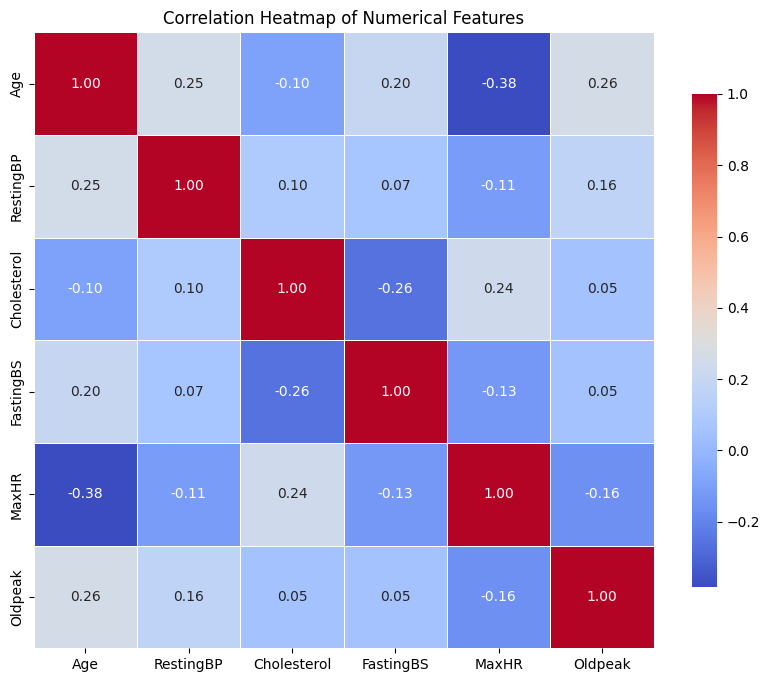

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming 'heart' is your DataFrame
# Calculate correlation matrix for numerical columns
correlation_matrix = heart[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


#### choose target variable
the target variable is Heart disease

In [ ]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

 #### Split it into train and test sets 

In [ ]:
X = heart[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'
       
              ]]

y = heart['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#### standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### load the model

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')


print(svc_model)

SVC(kernel='linear')


In [ ]:
### train the modeel
svc_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
#### make predictions
y_pred = svc_model.predict(X_test_scaled)

##### Evaluate the model

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: More detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8370
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.81        77
           1       0.89      0.82      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm = SVC()

# Define the hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],        # Kernel coefficient
    'degree': [2, 3, 4]                # Degree for polynomial kernel (only relevant for 'poly')
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Set Accuracy:", test_accuracy)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Hyperparameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8637312459230267
Test Set Accuracy: 0.8858695652173914


#### Applying Hyperparameters
1. idemtify the best parameters
2. use the best parameters to train the model
3. evalutate the model


In [ ]:
### identify the best parameters
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01],  # Kernel coefficient for 'rbf', 'poly'
    'degree': [3, 4, 5]                   # Degree for the polynomial kernel
}
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}


c:\Users\Personal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Import necessary libraries
from sklearn.svm import SVC

# Step 1: Use the best parameters identified
best_params = {'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'degree':5}  # Replace with the actual best parameters

# Step 2: Create and train the SVM model with the best parameters
tuned_model = SVC(**best_params)

# Step 3: Train the model on the training data
tuned_model.fit(X_train, y_train)

# Step 4: The model is now tuned and ready for further use
print("Model tuned with best parameters.")


Model tuned with best parameters.


In [ ]:
#### evaluate the model
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: More detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8641
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are already defined as per the previous steps

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (SVC models work better with standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVC model
svc_model = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01],  # Kernel coefficient for 'rbf', 'poly'
    'degree': [3, 4, 5]                   # Degree for the polynomial kernel
}

# Initialize GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model directly from GridSearchCV
best_model = grid_search.best_estimator_

# Train the model using the best hyperparameters
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Hyperparameters: {accuracy:.4f}")

# Print the classification report for detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, print the best hyperparameters found
print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Accuracy with Best Hyperparameters: 0.8641
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Best Hyperparameters from GridSearchCV: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}


#### plot a confusion metric to illustrate the accuracy of the model

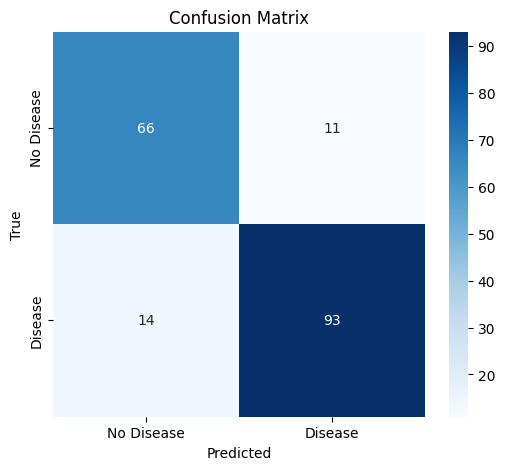

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


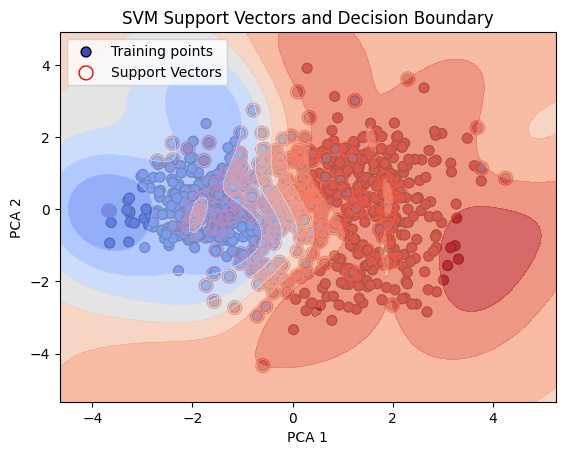

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce to 2D using PCA (Principal Component Analysis) for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Initialize the SVM classifier with the best parameters
best_model = SVC(kernel='rbf', C=10, gamma='scale')  # Example, you can replace with your best model
best_model.fit(X_train_2d, y_train)

# Plot the training data points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k', label='Training points')

# Highlight the support vectors
support_vectors = best_model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='r', s=100, label='Support Vectors')

# Plot the decision boundary (optional)
# Create a grid to evaluate the decision function on
xx, yy = np.meshgrid(np.linspace(X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1, 100),
                     np.linspace(X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1, 100))

# Predict the decision function values for the grid points
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)

# Add labels and legend
plt.title("SVM Support Vectors and Decision Boundary")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()
